In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
import numpy as np

In [2]:
df =pd.read_csv('gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

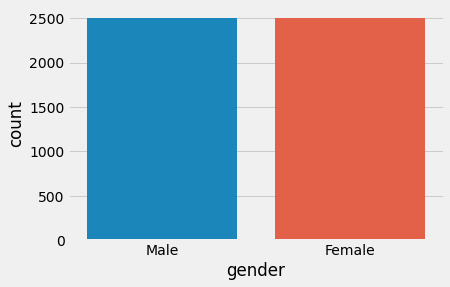

In [4]:
plt.style.use('fivethirtyeight')
sns.countplot(x=df['gender'])
plt.show()

In [5]:
df['gender'].replace(['Male', 'Female'],[1,0],inplace=True)

In [6]:
cols2 = ['forehead_height_cm','forehead_width_cm']

In [7]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(df[cols2])
scaled = scaler.fit_transform(df[cols2])

In [8]:
for i in range(2):
    df[cols2[i]] =scaled[:,i]

In [9]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,0.097561,0.50,1,0,1,1,1
1,0,0.634146,0.15,0,0,1,0,0
2,0,0.097561,0.60,1,1,1,1,1
3,0,0.731707,0.50,0,1,1,1,1
4,1,0.512195,0.40,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,0.536585,0.00,0,0,0,0,0
4997,1,0.121951,0.15,0,0,0,0,0
4998,1,0.365854,0.30,0,0,0,0,0
4999,1,0.439024,0.55,0,0,0,0,0


In [10]:
x  = df.drop('gender', axis=1)
y =  df['gender']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [13]:
x_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
4768,1,0.390244,0.65,0,0,0,0
65,1,0.097561,0.00,0,0,1,1
177,1,0.146341,0.20,1,1,1,1
4489,1,0.243902,0.50,1,1,1,1
3889,1,0.634146,0.75,1,1,1,1
...,...,...,...,...,...,...,...
2895,0,1.000000,0.75,1,1,1,1
2763,1,0.536585,0.50,0,0,0,0
905,1,0.487805,0.20,0,0,0,0
3980,1,0.560976,0.30,0,1,1,1


In [14]:
encoder_input = keras.Input(shape=(7,), name='img')

In [15]:
x = keras.layers.Flatten()(encoder_input)

In [16]:
encoder_output = keras.layers.Dense(64, activation="relu")(x)

In [17]:
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

In [18]:
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)

In [31]:
decoder_output = keras.layers.Dense(7, activation="relu")(decoder_input)

In [32]:
decoder_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_4')>

In [33]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

C:\Users\Vineet Roy\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [34]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

In [35]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 7)]               0         
_________________________________________________________________
flatten (Flatten)            (None, 7)                 0         
_________________________________________________________________
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 455       
Total params: 5,127
Trainable params: 5,127
Non-trainable params: 0
_________________________________________________________________


In [36]:
autoencoder.compile(opt, loss='binary_crossentropy')

In [41]:
epochs=3

for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=10, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

315/315 [==============================] - 1s 2ms/step - loss: 0.2359 - val_loss: 0.1740
INFO:tensorflow:Assets written to: models/AE-1.model\assets
315/315 [==============================] - 1s 2ms/step - loss: 0.1505 - val_loss: 0.1460
INFO:tensorflow:Assets written to: models/AE-2.model\assets
315/315 [==============================] - 1s 2ms/step - loss: 0.1756 - val_loss: 0.1484
INFO:tensorflow:Assets written to: models/AE-3.model\assets


In [46]:
example = encoder.predict(x_test)

In [47]:
example

array([[0.2617953 , 0.        , 0.20150664, ..., 0.06436519, 0.        ,
        0.        ],
       [0.60034573, 0.        , 0.18943313, ..., 0.31661367, 0.        ,
        0.4436615 ],
       [0.24767561, 0.        , 0.        , ..., 0.        , 0.        ,
        0.08034649],
       ...,
       [0.5782018 , 0.        , 0.30752748, ..., 0.2914097 , 0.17668828,
        0.3809461 ],
       [0.24133812, 0.        , 0.06754695, ..., 0.04632137, 0.        ,
        0.        ],
       [0.39607584, 0.        , 0.3468518 , ..., 0.46448854, 0.        ,
        0.2111287 ]], dtype=float32)